In [13]:
%load_ext autoreload 
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time
from texttable import Texttable
import latextable
from sklearn.metrics import silhouette_score

#our implementation
import Kmeans_Kkmeans

#data
from sklearn import datasets


np.random.seed(40)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
#number of sample to generate
n = 1000

X_moon, y_moon = datasets.make_moons(n_samples=n, noise=.05)
X_circles, y_circles = datasets.make_circles(n_samples = n, noise = .05, factor=.5)
X_classes, y_classes = datasets.make_classification(n_samples=n, n_features=20)
X_swiss, y_swiss = datasets.make_swiss_roll(n_samples=n, noise = .03)
X_iris, y_iris = datasets.load_iris().data, datasets.load_iris().target

datasets_names = {'moon': X_moon, 'circles': X_circles, 'classes': X_classes, 'swiss': X_swiss, 'iris': X_iris}
datasets_labels = {'moon': y_moon, 'circles': y_circles, 'classes': y_classes, 'swiss': y_swiss, 'iris': y_iris}

print("data name", "X shape", "y shape", "number of classes", sep=" | ")
for i, j in datasets_names.items():
    print(i, j.shape, datasets_labels[i].shape, len(set(datasets_labels[i])), sep=" | ")

data name | X shape | y shape | number of classes
moon | (1000, 2) | (1000,) | 2
circles | (1000, 2) | (1000,) | 2
classes | (1000, 20) | (1000,) | 2
swiss | (1000, 3) | (1000,) | 1000
iris | (150, 4) | (150,) | 3


In [15]:
rows = [
        ["Datasets", "X shape", "y shape", 'number of classes'],
        ]

for i, j in datasets_names.items():
    row = [i, j.shape, datasets_labels[i].shape, len(set(datasets_labels[i]))]
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * len(rows[0]))
table.set_deco(Texttable.HEADER | Texttable.VLINES) #| Texttable.HLINES)
# table.set_cols_dtype(["t"]*len(rows[0]))

table.add_rows(rows=rows)
print(table.draw())

Datasets |  X shape   | y shape | number of classes
=========+============+=========+==================
  moon   | (1000, 2)  | (1000,) |         2        
circles  | (1000, 2)  | (1000,) |         2        
classes  | (1000, 20) | (1000,) |         2        
 swiss   | (1000, 3)  | (1000,) |       1000       
  iris   |  (150, 4)  | (150,)  |         3        


In [16]:
print(latextable.draw_latex(table, caption="Used Datasets Characteristics."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c}
			Datasets & X shape & y shape & number of classes \\
			\hline
			moon & (1000, 2) & (1000,) & 2 \\
			circles & (1000, 2) & (1000,) & 2 \\
			classes & (1000, 20) & (1000,) & 2 \\
			swiss & (1000, 3) & (1000,) & 1000 \\
			iris & (150, 4) & (150,) & 3 \\
		\end{tabular}
	\end{center}
	\caption{Used Datasets Characteristics.}
\end{table}


In [18]:
max_iter = 500
halt = 1e-3

kernels  = ['linear', 'rbf', 'sigmoid', 'polynomial', 'cosine', 'laplacian']

#k is the number of clusters
results = {
    'moon': {'k': 2, 'Kmeans': {'execution_time':None, 'clusters':None, 'silhouette_score':None}, 'KKmeans': {'execution_time':list(), 'clusters':list(), 'silhouette_score': list()}}, 
    'circles': {'k': 2, 'Kmeans': {'execution_time':None, 'clusters':None, 'silhouette_score':None}, 'KKmeans': {'execution_time':list(), 'clusters':list(), 'silhouette_score': list()}}, 
    'classes': {'k': 2, 'Kmeans': {'execution_time':None, 'clusters':None, 'silhouette_score':None}, 'KKmeans': {'execution_time':list(), 'clusters':list(), 'silhouette_score': list()}},
    'swiss': {'k': 2, 'Kmeans': {'execution_time':None, 'clusters':None, 'silhouette_score':None}, 'KKmeans': {'execution_time':list(), 'clusters':list(), 'silhouette_score': list()}},
    'iris': {'k': 2, 'Kmeans': {'execution_time':None, 'clusters':None, 'silhouette_score':None}, 'KKmeans': {'execution_time':list(), 'clusters':list(), 'silhouette_score': list()}},
    }

for data in results.keys():
    k = results[data]['k']
    for ki, kernel in enumerate(kernels):
        #use Kmeans (should have same result as linear-kmeans)
        start = time.time()
        """
        run kmeans kernels with their default parameters 
        linear: c=0, rbf: gamma=1, sigmoid: gamma=1 and c=1, polynomial: degree=3,
        cosine: no parameters, laplacian: gamma=1
        
        """
        
        kclusters = Kmeans_Kkmeans.kernel_kmeans(X=datasets_names[data], k=k, max_iter=max_iter, kernel=kernel, halt=halt, par1=None, par2=None)
        results[data]['KKmeans']['clusters'].append(kclusters)
        end = time.time()-start
        results[data]['KKmeans']['execution_time'].append(end)
        results[data]['KKmeans']['silhouette_score'].append(silhouette_score(datasets_names[data], results[data]['KKmeans']['clusters'][ki]))
        
    #Kmeans
    start = time.time()
    centroids, results[data]['Kmeans']['clusters'] = Kmeans_Kkmeans.kmeans(X=datasets_names[data], k=k, max_iter=max_iter, history=False)
    end = time.time()-start
    results[data]['Kmeans']['execution_time'] = end
    results[data]['Kmeans']['silhouette_score'] = silhouette_score(datasets_names[data], results[data]['Kmeans']['clusters'])
    

Text(0, 0.5, 'Iris')

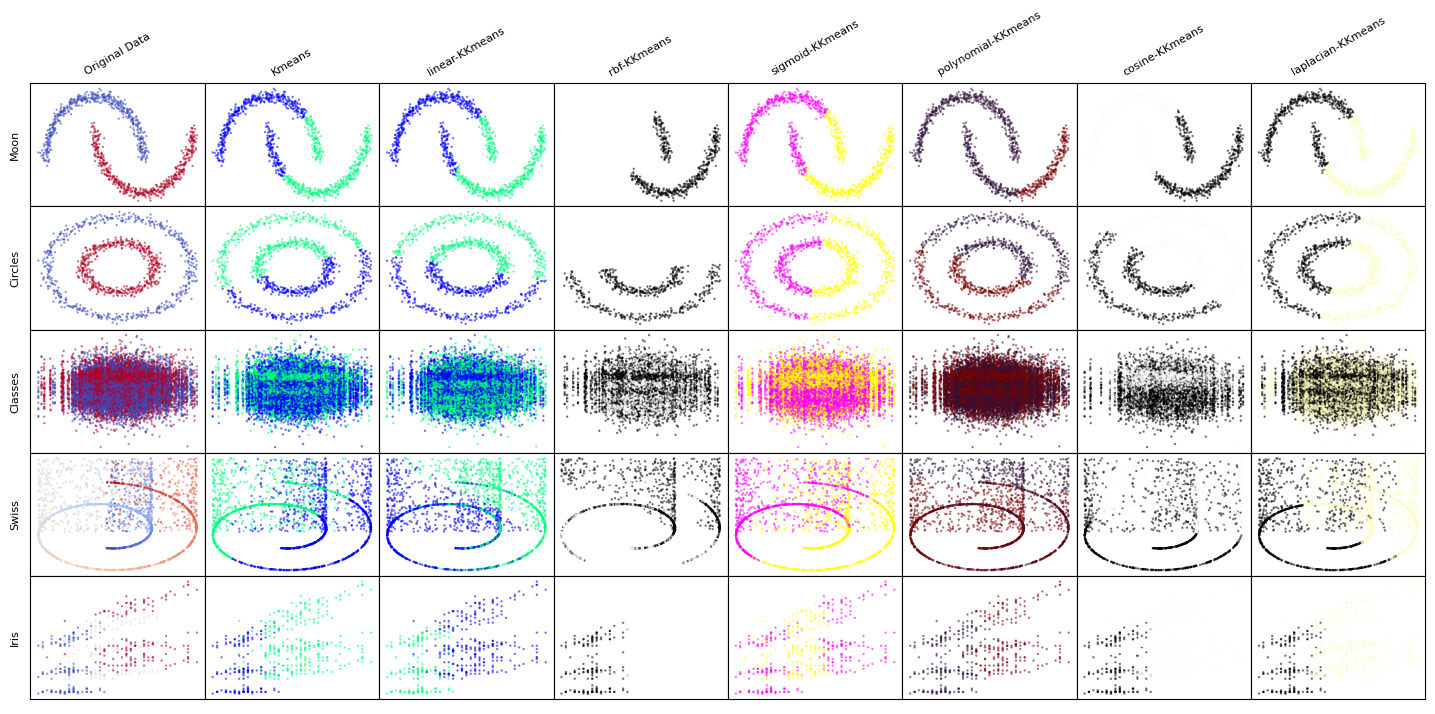

In [19]:
org_color = 'coolwarm'
kernels_colors = ['winter', 'cubehelix', 'spring', 'turbo', 'gist_earth', 'magma']


fig, ax = plt.subplots(nrows=5, ncols=8, figsize=(18,8), gridspec_kw=dict(hspace=0, wspace=0),
                       subplot_kw={'xticks':[], 'yticks':[]})

#plot original data
ax[0, 0].scatter(datasets_names['moon'][:, 0], datasets_names['moon'][:, 1], c = datasets_labels['moon'], s = 0.5, alpha=0.5, cmap = org_color)
ax[1, 0].scatter(datasets_names['circles'][:, 0], datasets_names['circles'][:, 1], c = datasets_labels['circles'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['classes'].shape[1]):
    ax[2, 0].scatter(datasets_names['classes'][:, 0], datasets_names['classes'][:, i], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['swiss'].shape[1]):
    ax[3, 0].scatter(datasets_names['swiss'][:, 0], datasets_names['swiss'][:, i], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['iris'].shape[1]):
    ax[4, 0].scatter(datasets_names['iris'][:, 0], datasets_names['iris'][:, i], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = org_color)
    

#plot Kmeans
ax[0, 1].scatter(datasets_names['moon'][:, 0], datasets_names['moon'][:, 1], c = results['moon']['Kmeans']['clusters'], s = 0.5, alpha=0.5, cmap = kernels_colors[0])
ax[1, 1].scatter(datasets_names['circles'][:, 0], datasets_names['circles'][:, 1], c = results['circles']['Kmeans']['clusters'], s = 0.5, alpha=0.5, cmap = kernels_colors[0])
for i in range(1, datasets_names['classes'].shape[1]):
    ax[2, 1].scatter(datasets_names['classes'][:, 0], datasets_names['classes'][:, i], c = results['classes']['Kmeans']['clusters'], s = 0.5, alpha=0.5, cmap = kernels_colors[0])
for i in range(1, datasets_names['swiss'].shape[1]):
    ax[3, 1].scatter(datasets_names['swiss'][:, 0], datasets_names['swiss'][:, i], c = results['swiss']['Kmeans']['clusters'], s = 0.5, alpha=0.5, cmap = kernels_colors[0])
for i in range(1, datasets_names['iris'].shape[1]):
    ax[4, 1].scatter(datasets_names['iris'][:, 0], datasets_names['iris'][:, i], c = results['iris']['Kmeans']['clusters'], s = 0.5, alpha=0.5, cmap = kernels_colors[0])
    
#plot Kmeans linear kernel
for ki in range(len(kernels)):
    ax[0, ki+2].scatter(datasets_names['moon'][:, 0], datasets_names['moon'][:, 1], c = results['moon']['KKmeans']['clusters'][ki], s = 0.5, alpha=0.5, cmap = kernels_colors[ki])
    ax[1, ki+2].scatter(datasets_names['circles'][:, 0], datasets_names['circles'][:, 1], c = results['circles']['KKmeans']['clusters'][ki], s = 0.5, alpha=0.5, cmap = kernels_colors[ki])
    for i in range(1, datasets_names['classes'].shape[1]):
        ax[2, ki+2].scatter(datasets_names['classes'][:, 0], datasets_names['classes'][:, i], c = results['classes']['KKmeans']['clusters'][ki], s = 0.5, alpha=0.5, cmap = kernels_colors[ki])
    for i in range(1, datasets_names['swiss'].shape[1]):
        ax[3, ki+2].scatter(datasets_names['swiss'][:, 0], datasets_names['swiss'][:, i], c = results['swiss']['KKmeans']['clusters'][ki], s = 0.5, alpha=0.5, cmap = kernels_colors[ki])
    for i in range(1, datasets_names['iris'].shape[1]):
        ax[4, ki+2].scatter(datasets_names['iris'][:, 0], datasets_names['iris'][:, i], c = results['iris']['KKmeans']['clusters'][ki], s = 0.5, alpha=0.5, cmap = kernels_colors[ki])
    

#set titles
ax[0,0].set_title('Original Data', fontsize=8, rotation=30)
ax[0,1].set_title('Kmeans', fontsize=8, rotation=30)
ax[0,2].set_title('linear-KKmeans', fontsize=8, rotation=30)
ax[0,3].set_title('rbf-KKmeans', fontsize=8, rotation=30)
ax[0,4].set_title('sigmoid-KKmeans', fontsize=8, rotation=30)
ax[0,5].set_title('polynomial-KKmeans', fontsize=8, rotation=30)
ax[0,6].set_title('cosine-KKmeans', fontsize=8, rotation=30)
ax[0,7].set_title('laplacian-KKmeans', fontsize=8, rotation=30)

#set datasets names
ax[0,0].set_ylabel('Moon', fontsize=8, rotation=90)
ax[1,0].set_ylabel('Circles', fontsize=8, rotation=90)
ax[2,0].set_ylabel('Classes', fontsize=8, rotation=90)
ax[3,0].set_ylabel('Swiss', fontsize=8, rotation=90)
ax[4,0].set_ylabel('Iris', fontsize=8, rotation=90)

In [27]:
#Kmeans and Kmeans kernels silhouette scores comparison

rows = [
        ["", "Kmeans", "linear", 'rbf', 'sigmoid', 'polynomial', 'cosine', 'laplacian'],
        ]
for data in datasets_names.keys():
    row = [data]
    row.append(round(results[data]['Kmeans']['silhouette_score'], 3))
    for t in results[data]['KKmeans']['silhouette_score']:
        row.append(round(t, 3))
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * 8)
table.set_deco(Texttable.HEADER | Texttable.VLINES)

table.add_rows(rows=rows)
print(table.draw())

        | Kmeans | linear |  rbf  | sigmoid | polynomial | cosine | laplacian
========+========+========+=======+=========+============+========+==========
 moon   | 0.494  | 0.494  | 0.494 |  0.492  |   0.426    | 0.493  |   0.494  
circles | 0.351  | 0.354  | 0.351 |  0.349  |   0.355    | 0.354  |   0.348  
classes | 0.087  | 0.087  | 0.086 |  0.069  |   0.086    | 0.058  |   0.081  
 swiss  | 0.272  | 0.224  | 0.131 |  0.259  |   0.216    | 0.269  |   0.251  
 iris   | 0.681  | 0.650  | 0.671 |  0.161  |   0.516    | 0.650  |   0.657  


In [28]:
print(latextable.draw_latex(table, caption="A comparison of Kmeans and kernel Kmeans silhouette score."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c|c|c|c|c}
			 & Kmeans & linear & rbf & sigmoid & polynomial & cosine & laplacian \\
			\hline
			moon & 0.494 & 0.494 & 0.494 & 0.492 & 0.426 & 0.493 & 0.494 \\
			circles & 0.351 & 0.354 & 0.351 & 0.349 & 0.355 & 0.354 & 0.348 \\
			classes & 0.087 & 0.087 & 0.086 & 0.069 & 0.086 & 0.058 & 0.081 \\
			swiss & 0.272 & 0.224 & 0.131 & 0.259 & 0.216 & 0.269 & 0.251 \\
			iris & 0.681 & 0.650 & 0.671 & 0.161 & 0.516 & 0.650 & 0.657 \\
		\end{tabular}
	\end{center}
	\caption{A comparison of Kmeans and kernel Kmeans silhouette score.}
\end{table}


In [30]:
#Kmeans and Kmeans kernels execution time (sec) comparison

rows = [
        ["", "Kmeans", "linear", 'rbf', 'sigmoid', 'polynomial', 'cosine', 'laplacian'],
        ]
for data in datasets_names.keys():
    row = [data]
    row.append(str(round(results[data]['Kmeans']['execution_time'], 4)))
    for t in results[data]['KKmeans']['execution_time']:
        row.append(str(round(t, 4)))
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * len(rows[0]))
table.set_deco(Texttable.HEADER | Texttable.VLINES)
table.set_cols_dtype(["t"]*len(rows[0]))

table.add_rows(rows=rows)
print(table.draw())

        | Kmeans | linear |  rbf   | sigmoid | polynomial | cosine | laplacian
========+========+========+========+=========+============+========+==========
 moon   | 0.0565 | 0.2057 | 0.1582 | 0.1441  |   0.1482   | 0.1202 |   0.224  
circles | 0.0812 | 0.1129 | 0.2301 | 0.1498  |   0.224    | 0.1482 |   0.18   
classes | 0.1103 | 0.1693 | 0.3524 | 0.2538  |   0.2174   | 0.2802 |  0.4858  
 swiss  | 0.1057 | 0.2414 | 0.2107 | 0.2237  |   0.2229   | 0.1262 |  0.2574  
 iris   | 0.005  | 0.002  | 0.003  | 0.0066  |   0.004    | 0.003  |   0.003  


In [31]:
print(latextable.draw_latex(table, caption="A comparison of Kmeans and kernel Kmeans execution time (in sec)."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c|c|c|c|c}
			 & Kmeans & linear & rbf & sigmoid & polynomial & cosine & laplacian \\
			\hline
			moon & 0.0565 & 0.2057 & 0.1582 & 0.1441 & 0.1482 & 0.1202 & 0.224 \\
			circles & 0.0812 & 0.1129 & 0.2301 & 0.1498 & 0.224 & 0.1482 & 0.18 \\
			classes & 0.1103 & 0.1693 & 0.3524 & 0.2538 & 0.2174 & 0.2802 & 0.4858 \\
			swiss & 0.1057 & 0.2414 & 0.2107 & 0.2237 & 0.2229 & 0.1262 & 0.2574 \\
			iris & 0.005 & 0.002 & 0.003 & 0.0066 & 0.004 & 0.003 & 0.003 \\
		\end{tabular}
	\end{center}
	\caption{A comparison of Kmeans and kernel Kmeans execution time (in sec).}
\end{table}
